In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing
from functools import reduce

In [2]:
mt = pd.read_csv(r'data\MT.csv',sep=';',low_memory=False, encoding='latin-1')
v1 = pd.read_csv(r'data\V1.csv',sep=';',low_memory=False, encoding='latin-1')
v2 = pd.read_csv(r'data\V2.csv',sep=';',low_memory=False, encoding='latin-1')
v3 = pd.read_csv(r'data\V3.csv',sep=';',low_memory=False, encoding='latin-1')

In [3]:
#dataset = pd.concat([mt,v1,v2,v3])
#dataset = dataset.reset_index(drop=True)
#dataset.head()

In [4]:
v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idlote                   2267 non-null   int64  
 1   idanimal                 2267 non-null   int64  
 2   tipo_venda               2267 non-null   object 
 3   tempo                    2267 non-null   int64  
 4   venda                    2267 non-null   int64  
 5   Baia                     2044 non-null   float64
 6   Genero                   2044 non-null   object 
 7   genotipo                 2044 non-null   object 
 8   Peso_inicial             2267 non-null   int64  
 9   Peso_final Jejum         2267 non-null   float64
 10  Peso_final               2267 non-null   float64
 11  Peso_arrobas             2267 non-null   float64
 12  RC                       2267 non-null   float64
 13  GMD                      2267 non-null   float64
 14  CMS%PV                  

<Axes: >

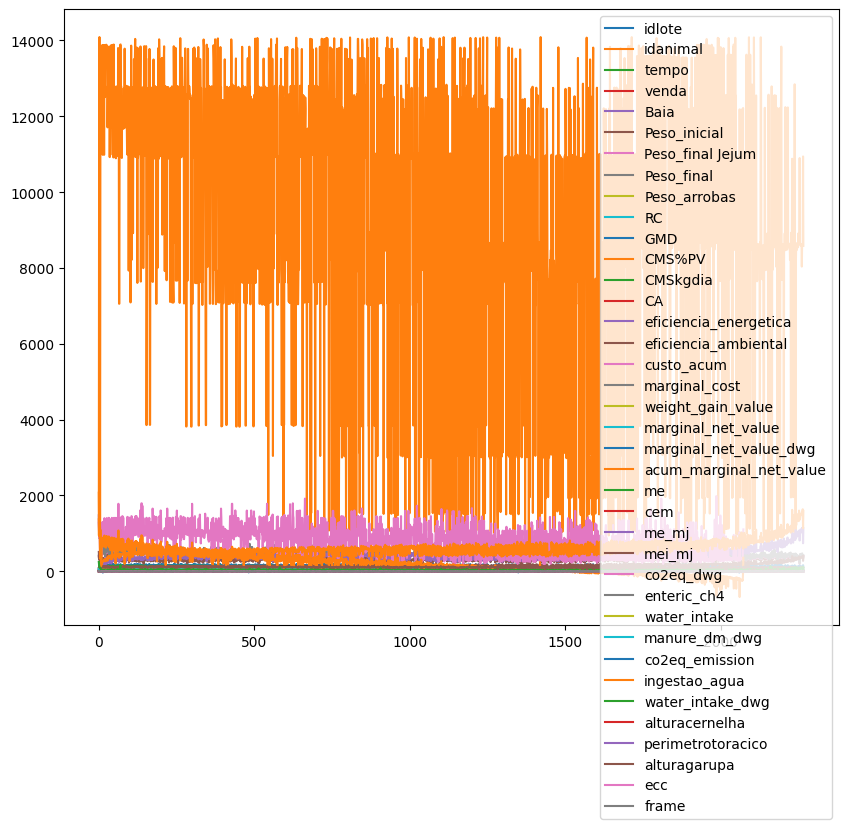

In [5]:
v2.plot(figsize = (10,8))

In [6]:
v2.isnull().sum().sort_values(ascending=False)

Baia                       223
Genero                     223
genotipo                   223
CA                         204
marginal_cost              193
marginal_net_value_dwg     193
marginal_net_value         193
weight_gain_value          193
custo_acum                 193
acum_marginal_net_value    193
ingestao_agua                0
co2eq_emission               0
me                           0
water_intake                 0
enteric_ch4                  0
co2eq_dwg                    0
water_intake_dwg             0
mei_mj                       0
me_mj                        0
alturacernelha               0
cem                          0
perimetrotoracico            0
alturagarupa                 0
ecc                          0
manure_dm_dwg                0
idlote                       0
idanimal                     0
eficiencia_ambiental         0
eficiencia_energetica        0
CMSkgdia                     0
CMS%PV                       0
GMD                          0
RC      

In [7]:
v2_new = v2.drop(columns=['Baia','Genero','genotipo','CA','marginal_cost','marginal_net_value_dwg','marginal_net_value','weight_gain_value','custo_acum','acum_marginal_net_value'])
v2_new.head()

,idlote,idanimal,tipo_venda,tempo,venda,Peso_inicial,Peso_final Jejum,Peso_final,Peso_arrobas,RC,...,water_intake,manure_dm_dwg,co2eq_emission,ingestao_agua,water_intake_dwg,alturacernelha,perimetrotoracico,alturagarupa,ecc,frame
0,10,969,V2,32,1,370,394.967070,415.754811,13.758685,52.252525,...,31.218133,57.273531,7.715974,2073.271012,247.234358,0,0,0.0,4.0,7.0
1,168,12781,V2,97,1,312,363.429600,378.572500,13.178900,54.393900,...,30.012000,39.170000,7.380100,1255.947600,152.539900,0,0,0.0,0.0,0.0
2,188,14089,V2,33,1,477,476.769300,496.634700,16.748700,52.694500,...,34.428500,31.415500,8.621200,1225.957600,114.493800,0,0,0.0,6.0,0.0
3,127,8640,V2,31,1,445,473.935800,493.683100,16.448900,52.060600,...,34.303800,24.661800,8.586900,1458.712600,93.309300,0,0,0.0,5.0,0.0
4,10,950,V2,32,1,304,355.658153,374.377004,12.389358,52.252525,...,29.647898,20.973385,7.281291,1138.252429,93.015743,0,0,0.0,3.0,7.0


In [8]:
v2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   idlote                 2267 non-null   int64  
 1   idanimal               2267 non-null   int64  
 2   tipo_venda             2267 non-null   object 
 3   tempo                  2267 non-null   int64  
 4   venda                  2267 non-null   int64  
 5   Peso_inicial           2267 non-null   int64  
 6   Peso_final Jejum       2267 non-null   float64
 7   Peso_final             2267 non-null   float64
 8   Peso_arrobas           2267 non-null   float64
 9   RC                     2267 non-null   float64
 10  GMD                    2267 non-null   float64
 11  CMS%PV                 2267 non-null   float64
 12  CMSkgdia               2267 non-null   float64
 13  eficiencia_energetica  2267 non-null   float64
 14  eficiencia_ambiental   2267 non-null   float64
 15  me  

<Axes: >

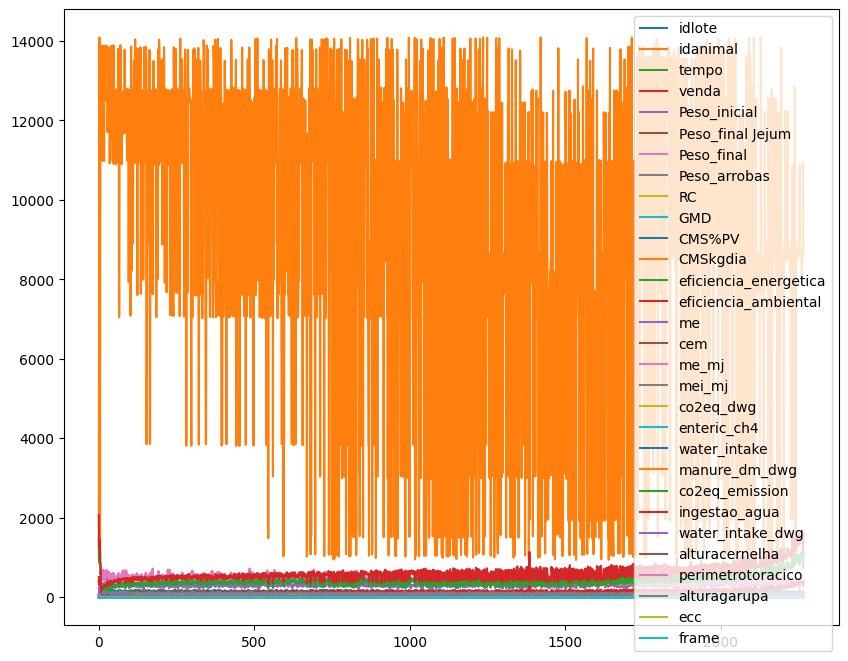

In [9]:
v2_new.plot(figsize = (10,8))

In [10]:
v2_new['idanimal'].nunique()

1967

In [11]:
v2_new.shape

(2267, 31)

In [12]:
v2_new = v2_new.drop(columns=['idanimal', 'tipo_venda','alturacernelha','perimetrotoracico','alturagarupa','ecc','frame'])
v2_new.shape

(2267, 24)

In [13]:
#v2_new.reset_index(inplace = True, drop = True)
v2_new.shape

(2267, 24)

In [14]:
v2_new.head()

,idlote,tempo,venda,Peso_inicial,Peso_final Jejum,Peso_final,Peso_arrobas,RC,GMD,CMS%PV,...,cem,me_mj,mei_mj,co2eq_dwg,enteric_ch4,water_intake,manure_dm_dwg,co2eq_emission,ingestao_agua,water_intake_dwg
0,10,32,1,370,394.967070,415.754811,13.758685,52.252525,1.429838,2.065096,...,22.742919,11.143773,95.156374,61.107236,0.277551,31.218133,57.273531,7.715974,2073.271012,247.234358
1,168,97,1,312,363.429600,378.572500,13.178900,54.393900,0.686314,2.135800,...,21.163700,11.009400,88.548900,37.510100,0.267300,30.012000,39.170000,7.380100,1255.947600,152.539900
2,188,33,1,477,476.769300,496.634700,16.748700,52.694500,0.594991,1.995200,...,25.942200,11.009400,108.542300,28.670100,0.304800,34.428500,31.415500,8.621200,1225.957600,114.493800
3,127,31,1,445,473.935800,493.683100,16.448900,52.060600,1.570423,1.996900,...,25.902800,11.050200,108.377300,23.357100,0.303700,34.303800,24.661800,8.586900,1458.712600,93.309300
4,10,32,1,304,355.658153,374.377004,12.389358,52.252525,2.199281,2.120946,...,21.023263,11.143773,87.961331,22.843937,0.264238,29.647898,20.973385,7.281291,1138.252429,93.015743


In [15]:
v2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   idlote                 2267 non-null   int64  
 1   tempo                  2267 non-null   int64  
 2   venda                  2267 non-null   int64  
 3   Peso_inicial           2267 non-null   int64  
 4   Peso_final Jejum       2267 non-null   float64
 5   Peso_final             2267 non-null   float64
 6   Peso_arrobas           2267 non-null   float64
 7   RC                     2267 non-null   float64
 8   GMD                    2267 non-null   float64
 9   CMS%PV                 2267 non-null   float64
 10  CMSkgdia               2267 non-null   float64
 11  eficiencia_energetica  2267 non-null   float64
 12  eficiencia_ambiental   2267 non-null   float64
 13  me                     2267 non-null   float64
 14  cem                    2267 non-null   float64
 15  me_m

<Axes: >

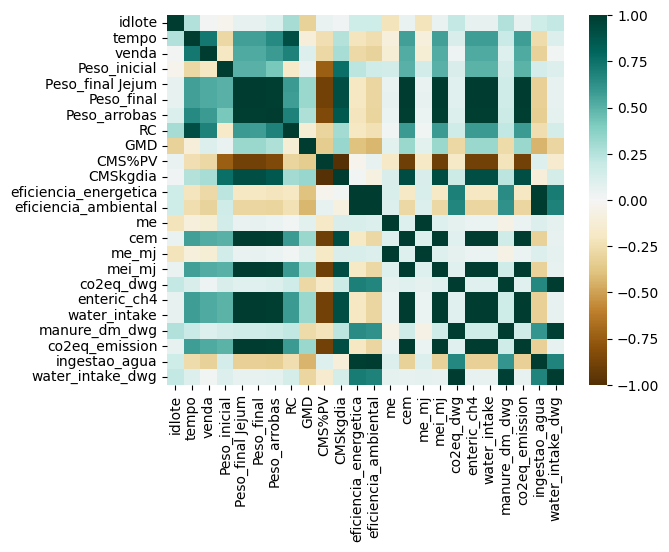

In [24]:
sns.heatmap(v2_new.corr(),
           vmin = -1, vmax = 1, cmap = 'BrBG')

In [26]:
list(v2_new.columns)

['idlote',
 'tempo',
 'venda',
 'Peso_inicial',
 'Peso_final Jejum',
 'Peso_final',
 'Peso_arrobas',
 'RC',
 'GMD',
 'CMS%PV',
 'CMSkgdia',
 'eficiencia_energetica',
 'eficiencia_ambiental',
 'me',
 'cem',
 'me_mj',
 'mei_mj',
 'co2eq_dwg',
 'enteric_ch4',
 'water_intake',
 'manure_dm_dwg',
 'co2eq_emission',
 'ingestao_agua',
 'water_intake_dwg']

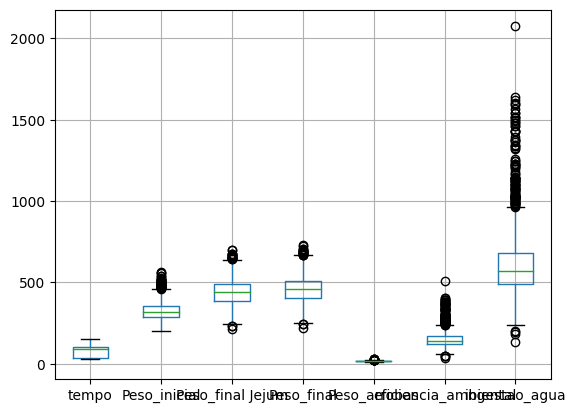

In [36]:
#boxplot = df.boxplot(column=['Price'],by="Date")
boxplot = v2_new.boxplot(column=['tempo','Peso_inicial',
 'Peso_final Jejum',
 'Peso_final',
 'Peso_arrobas',
  'eficiencia_ambiental',
 'ingestao_agua'
 ])

boxplot.plot()

plt.show()

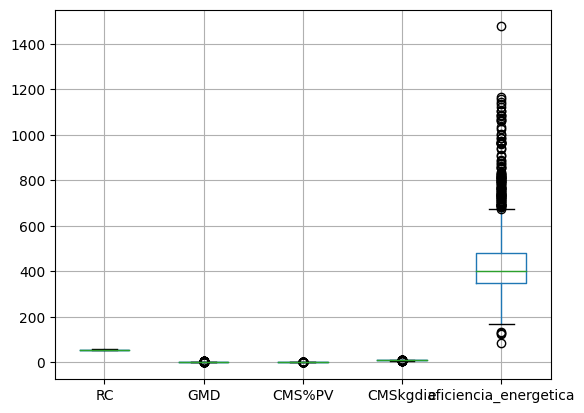

In [37]:
boxplot2 = v2_new.boxplot(column=['RC',
 'GMD',
 'CMS%PV',
 'CMSkgdia',
 'eficiencia_energetica' ])
boxplot2.plot()

plt.show()

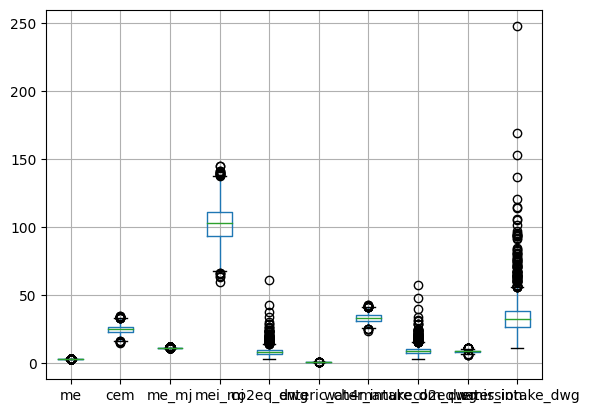

In [38]:
boxplot3 = v2_new.boxplot(column=['me',
 'cem',
 'me_mj',
 'mei_mj',
 'co2eq_dwg',
 'enteric_ch4',
 'water_intake',
 'manure_dm_dwg',
 'co2eq_emission',
 'water_intake_dwg'])
boxplot3.plot()

plt.show()

In [16]:
#v2 = v2['idanimal'].unique()
#vars_list = ['Peso_arrobas',
#              'Peso_final',
#              'co2eq_emission',
#              'alturagarupa',
#              'manure_dm_dwg',
#              'ecc',
#              'frame']

In [17]:
temp = v2_new.copy()
tmp_df = None
for i in range(temp.shape[1]):
    tmp = temp.iloc[:,i]
    tmp[np.isnan(tmp)] = 0
    normalized = preprocessing.normalize([tmp])
    tmp_df = pd.concat([tmp_df, pd.DataFrame(normalized).T],axis=1)


C:\Users\crist\AppData\Local\Temp\ipykernel_22044\2656091021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[np.isnan(tmp)] = 0
C:\Users\crist\AppData\Local\Temp\ipykernel_22044\2656091021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[np.isnan(tmp)] = 0
C:\Users\crist\AppData\Local\Temp\ipykernel_22044\2656091021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[np.isnan(tmp)] = 0
C:\Users\crist\AppData\Local\Te

In [18]:
tmp_df = tmp_df.reset_index(drop=True)
tmp_df.columns = temp.columns
tmp_df

,idlote,tempo,venda,Peso_inicial,Peso_final Jejum,Peso_final,Peso_arrobas,RC,GMD,CMS%PV,...,cem,me_mj,mei_mj,co2eq_dwg,enteric_ch4,water_intake,manure_dm_dwg,co2eq_emission,ingestao_agua,water_intake_dwg
0,0.001528,0.007335,0.014096,0.023445,0.018618,0.018799,0.017879,0.020283,0.017602,0.020604,...,0.019453,0.021229,0.019453,0.142640,0.019890,0.019836,0.126134,0.019652,0.068560,0.143693
1,0.025666,0.022234,0.014096,0.019770,0.017132,0.017118,0.017125,0.021114,0.008449,0.021309,...,0.018103,0.020974,0.018103,0.087558,0.019156,0.019069,0.086264,0.018797,0.041532,0.088656
2,0.028721,0.007564,0.014096,0.030226,0.022474,0.022456,0.021764,0.020455,0.007325,0.019907,...,0.022190,0.020974,0.022190,0.066923,0.021843,0.021876,0.069187,0.021958,0.040541,0.066544
3,0.019402,0.007106,0.014096,0.028198,0.022341,0.022323,0.021374,0.020209,0.019333,0.019924,...,0.022156,0.021051,0.022156,0.054521,0.021764,0.021796,0.054313,0.021870,0.048238,0.054231
4,0.001528,0.007335,0.014096,0.019263,0.016765,0.016928,0.016099,0.020283,0.027074,0.021161,...,0.017982,0.021229,0.017982,0.053324,0.018936,0.018838,0.046190,0.018545,0.037640,0.054061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,0.019402,0.007106,0.014096,0.027691,0.021358,0.021341,0.020434,0.020209,0.013887,0.020156,...,0.021421,0.021051,0.021421,0.055468,0.021284,0.021294,0.054869,0.021294,0.051668,0.055359
2263,0.019402,0.007106,0.014096,0.023636,0.017806,0.017792,0.017036,0.020209,0.008135,0.021095,...,0.018690,0.021051,0.018690,0.052694,0.019500,0.019425,0.050462,0.019191,0.052859,0.053233
2264,0.019555,0.007106,0.014096,0.023255,0.018390,0.018375,0.017646,0.020267,0.015637,0.020922,...,0.019147,0.021051,0.019147,0.069254,0.019793,0.019738,0.066733,0.019539,0.054095,0.069823
2265,0.024902,0.019942,0.014096,0.020277,0.015975,0.015962,0.015478,0.020465,0.004672,0.022644,...,0.017178,0.020974,0.017178,0.005982,0.018554,0.018435,0.005807,0.018101,0.037514,0.006080


<Axes: >

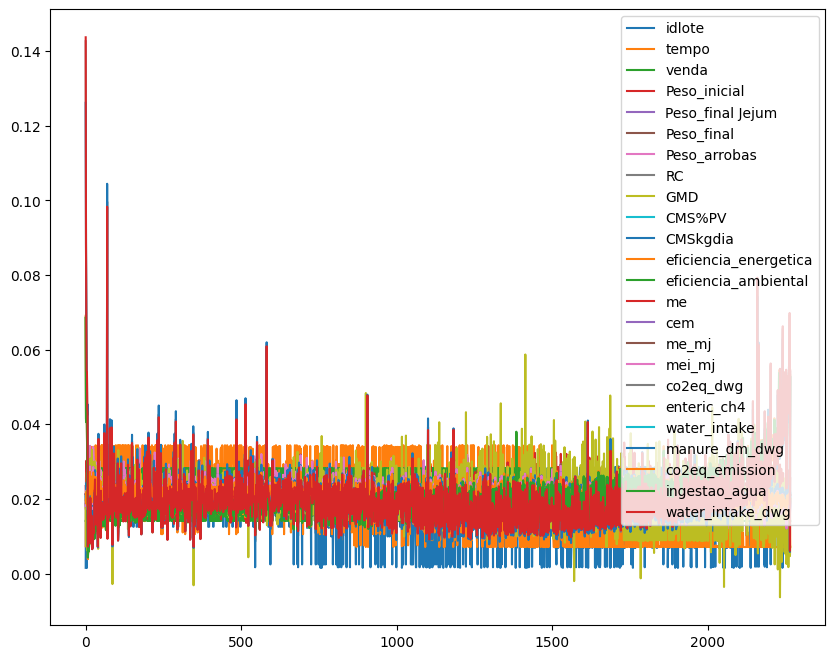

In [19]:
tmp_df.plot(figsize = (10,8))

<Axes: >

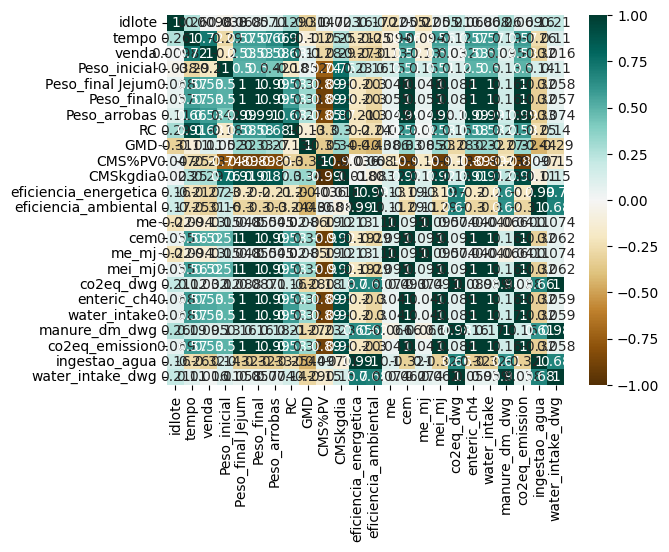

In [20]:
sns.heatmap(tmp_df.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: >

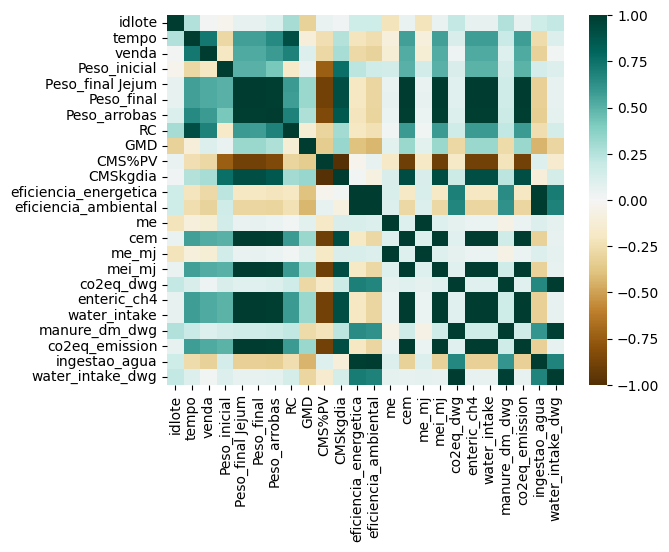

In [21]:
sns.heatmap(tmp_df.corr(),
           vmin = -1, vmax = 1, cmap = 'BrBG')

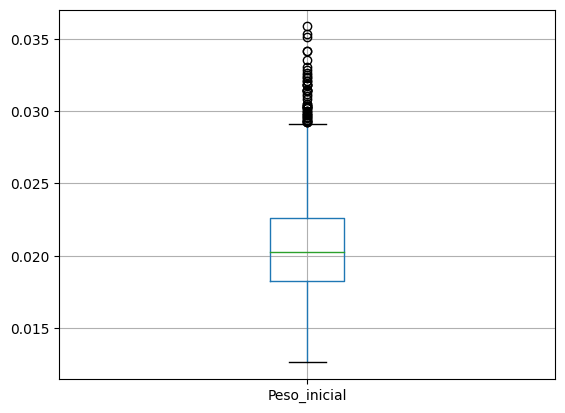

In [22]:
boxplot = tmp_df.boxplot(column=['Peso_inicial'])
boxplot.plot()

plt.show()

In [ ]:
normalizado = dataset/dataset.iloc[0]
normalizado.plot(figsize = (10,8))

In [ ]:
sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

In [ ]:
# Build Dir
import os
# os.chdir('/content')
CODE_DIR = 'code'

# Clone Github Repository
!git clone https://github.com/Valdecy/ELECTRE-Tree.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')

fatal: destination path 'code' already exists and is not an empty directory.


In [ ]:
from electre_tree import tree_e_tri_b , util_e_tri_b
from sklearn.model_selection import train_test_split

In [ ]:
temp = dataset.loc[:,vars_list]
tmp_df = None
for i in range(temp.shape[1]):
    tmp = temp.iloc[:,i]
    tmp[np.isnan(tmp)] = 0
    normalized = preprocessing.normalize([tmp])
    tmp_df = pd.concat([tmp_df, pd.DataFrame(normalized).T],axis=1)


In [ ]:
tmp_df = tmp_df.reset_index(drop=True)
tmp_df.columns = temp.columns
tmp_df

,Peso_arrobas,marginal_net_value_dwg,co2eq_emission,alturagarupa,manure_dm_dwg,ecc,frame
0,0.009099,0.018520,0.010005,0.0,0.043364,0.000000,0.000000
1,0.012553,0.010636,0.011822,0.0,0.026809,0.014072,0.000000
2,0.009104,0.014097,0.010009,0.0,0.019330,0.000000,0.000000
3,0.008654,0.005931,0.009737,0.0,0.017748,0.000000,0.000000
4,0.012025,0.007474,0.011522,0.0,0.008045,0.011258,0.000000
...,...,...,...,...,...,...,...
7956,0.010818,0.000000,0.011324,0.0,0.028474,0.016887,0.000000
7957,0.009019,0.000000,0.010206,0.0,0.026187,0.011258,0.000000
7958,0.009341,0.000000,0.010391,0.0,0.034631,0.014072,0.021836
7959,0.009652,0.000000,0.010602,0.0,0.027234,0.011258,0.000000


In [ ]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 4
target    = []
cut_level = [0.5, 1.0]
Q         = [0]*7#8
P         = [0]*7#8
V         = [2]*7#8
W         = []
B         = []
model     = 10#500

# Parameters - GA
elite       = 1
eta         = 1
mu          = 2
size        = 15
rate        = 0.05
generations = 30
samples     = 0.10 

In [ ]:
tmp_df = pd.concat([dataset.loc[:,['idanimal','idlote','tipo_venda']],tmp_df], axis=1)
tmp_df

,idanimal,idlote,tipo_venda,Peso_arrobas,marginal_net_value_dwg,co2eq_emission,alturagarupa,manure_dm_dwg,ecc,frame
0,12781,168,MT,0.009099,0.018520,0.010005,0.0,0.043364,0.000000,0.000000
1,14084,188,MT,0.012553,0.010636,0.011822,0.0,0.026809,0.014072,0.000000
2,12781,163,MT,0.009104,0.014097,0.010009,0.0,0.019330,0.000000,0.000000
3,10969,163,MT,0.008654,0.005931,0.009737,0.0,0.017748,0.000000,0.000000
4,13855,187,MT,0.012025,0.007474,0.011522,0.0,0.008045,0.011258,0.000000
...,...,...,...,...,...,...,...,...,...,...
7956,8621,127,V3,0.010818,0.000000,0.011324,0.0,0.028474,0.016887,0.000000
7957,8597,127,V3,0.009019,0.000000,0.010206,0.0,0.026187,0.011258,0.000000
7958,8655,128,V3,0.009341,0.000000,0.010391,0.0,0.034631,0.014072,0.021836
7959,8584,127,V3,0.009652,0.000000,0.010602,0.0,0.027234,0.011258,0.000000


In [ ]:
temp=tmp_df.loc[(tmp_df['idanimal']==12781)&(tmp_df['idlote']==168),:]
temp=temp.reset_index(drop=True)
temp = temp.drop(['idanimal','idlote','tipo_venda'],axis=1)

In [ ]:
temp

,Peso_arrobas,marginal_net_value_dwg,co2eq_emission,alturagarupa,manure_dm_dwg,ecc,frame
0,0.009099,0.018520,0.010005,0.0,0.043364,0.0,0.0
1,0.009200,0.000812,0.010034,0.0,0.039663,0.0,0.0
2,0.009066,0.008564,0.009996,0.0,0.044767,0.0,0.0
3,0.008583,0.016589,0.009886,0.0,0.105783,0.0,0.0


In [ ]:
models = tree_e_tri_b.tree_electre_tri_b(temp.to_numpy(), target_assignment = target, W = W, Q = Q, P = P, V = V, B = B, cut_level = cut_level, rule = rule, 
                                             number_of_classes = classes, elite = elite, eta = eta, mu = mu, population_size = size, mutation_rate = rate, 
                                             generations = generations, samples = samples, number_of_models = model)   

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [ ]:
tmp_df.loc[(tmp_df['idanimal']==idanimal)&(tmp_df['idlote']==idlote),:]

,idanimal,idlote,tipo_venda,Peso_arrobas,marginal_net_value_dwg,co2eq_emission,alturagarupa,manure_dm_dwg,ecc,frame
14,12794,168,MT,0.013810,0.006695,0.012783,0.0,0.006325,0.0,0.0
1298,12794,168,V1,0.014301,0.003733,0.013019,0.0,0.007105,0.0,0.0
3489,12794,168,V2,0.015949,0.006599,0.013753,0.0,0.012772,0.0,0.0
5754,12794,168,V3,0.016091,0.004496,0.013810,0.0,0.013860,0.0,0.0


In [ ]:
len(idanimal_arrays)

72

In [ ]:
modelos_list = []
idlote_arrays = tmp_df['idlote'].unique() 
for idlote in idlote_arrays[0:1]:
    idanimal_arrays = tmp_df.loc[tmp_df['idlote']==idlote,'idanimal'].unique() 
    for idanimal in idanimal_arrays:
        temp = tmp_df.loc[(tmp_df['idanimal']==idanimal)&(tmp_df['idlote']==idlote),:]
        temp = temp.reset_index(drop=True)
        temp = temp.drop(['idanimal','idlote','tipo_venda'],axis=1)
        if temp.shape[0] == 4:
            models = tree_e_tri_b.tree_electre_tri_b(temp.to_numpy(), target_assignment = target, W = W, Q = Q, P = P, V = V, B = B, cut_level = cut_level, rule = rule, 
                                                    number_of_classes = classes, elite = elite, eta = eta, mu = mu, population_size = size, mutation_rate = rate, 
                                                    generations = generations, samples = samples, number_of_models = model)   
        if temp.shape[0] == 3:
            models = tree_e_tri_b.tree_electre_tri_b(temp.to_numpy(), target_assignment = target, W = W, Q = Q, P = P, V = V, B = B, cut_level = cut_level, rule = rule, 
                                                    number_of_classes = 3, elite = elite, eta = eta, mu = mu, population_size = size, mutation_rate = rate, 
                                                    generations = generations, samples = samples, number_of_models = model)               
        modelos_list.append(models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
M

In [ ]:
prediction_list = []
solutions_list = []
i=0
for idlote in idlote_arrays[0:1]:
    idanimal_arrays = tmp_df.loc[tmp_df['idlote']==idlote,'idanimal'].unique() 
    for idanimal in idanimal_arrays:
        temp = tmp_df.loc[(tmp_df['idanimal']==idanimal)&(tmp_df['idlote']==idlote),:]
        temp = temp.reset_index(drop=True)
        temp = temp.drop(['idanimal','idlote','tipo_venda'],axis=1)
        # Predict
        prediction, solutions = tree_e_tri_b.predict(modelos_list[i], temp.to_numpy(), verbose = False, rule = rule)
        prediction_list.append(prediction)
        solutions_list.append(solutions)
        i+=1

In [ ]:
prediction, solutions = tree_e_tri_b.predict(models, temp.to_numpy(), verbose = False, rule = rule)

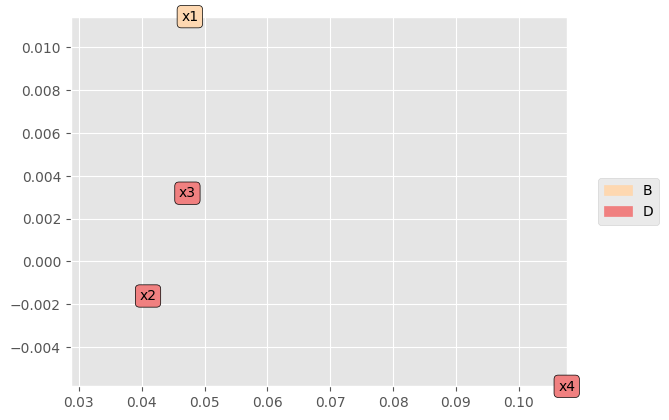

In [ ]:
util_e_tri_b.plot_points(temp.to_numpy(), prediction)

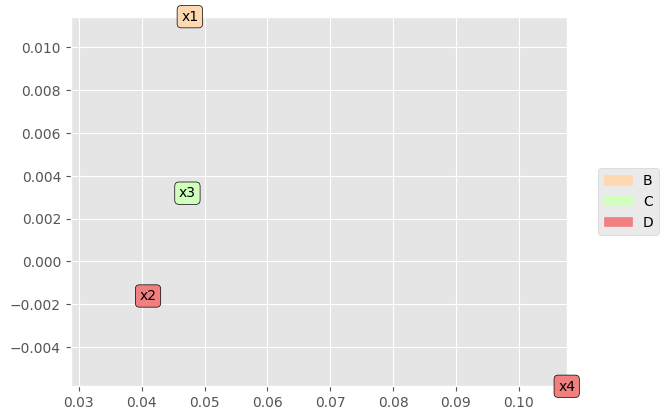

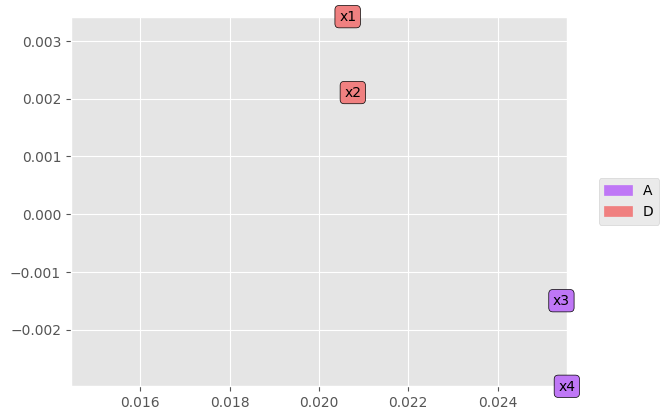

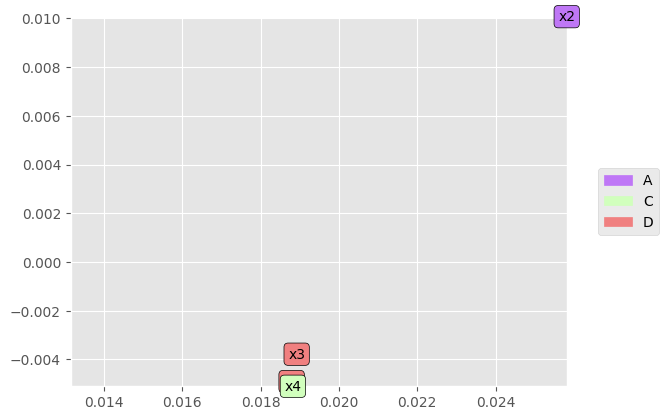

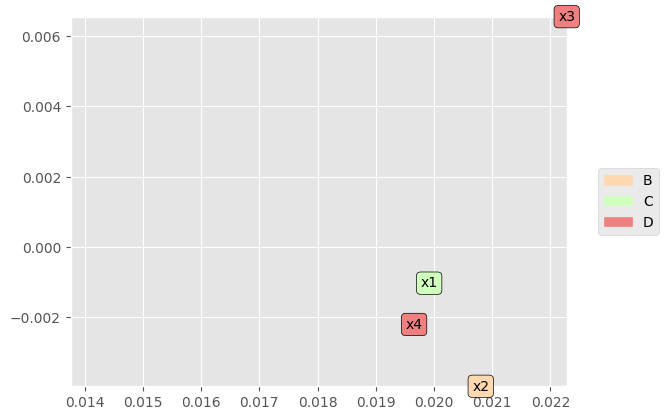

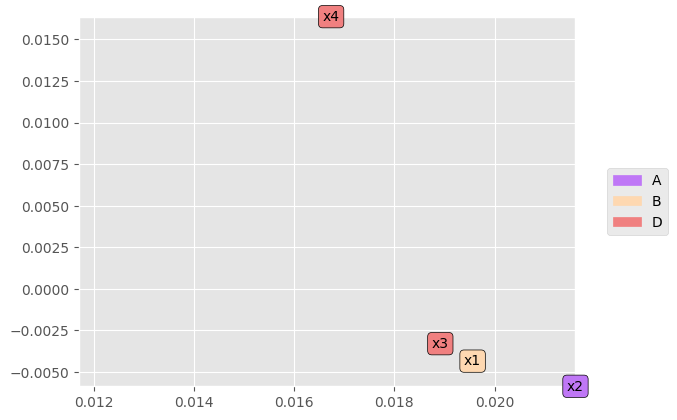

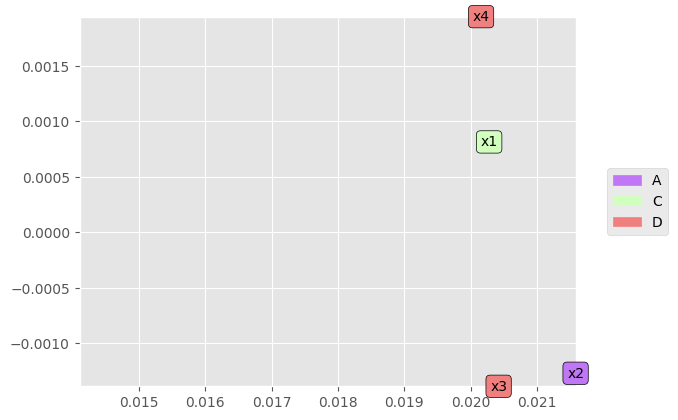

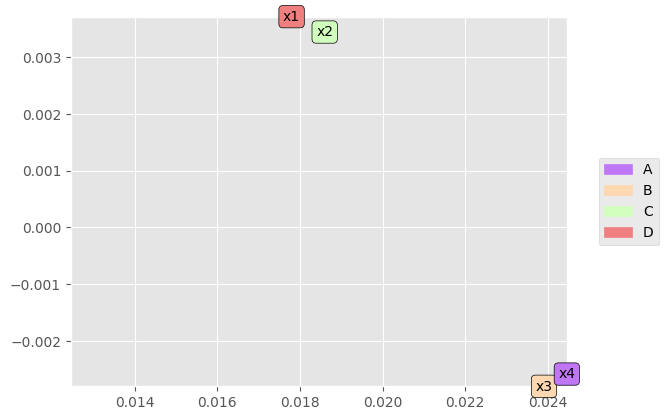

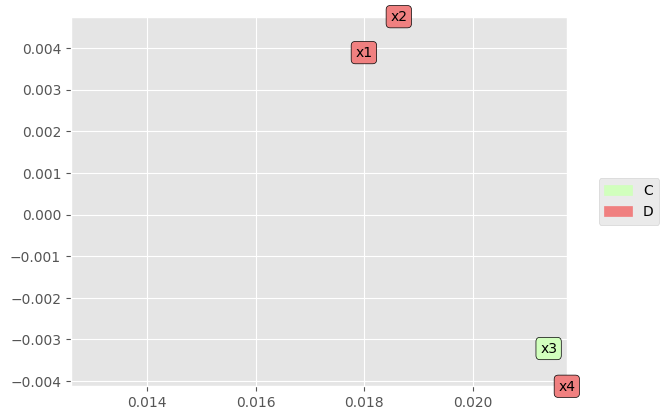

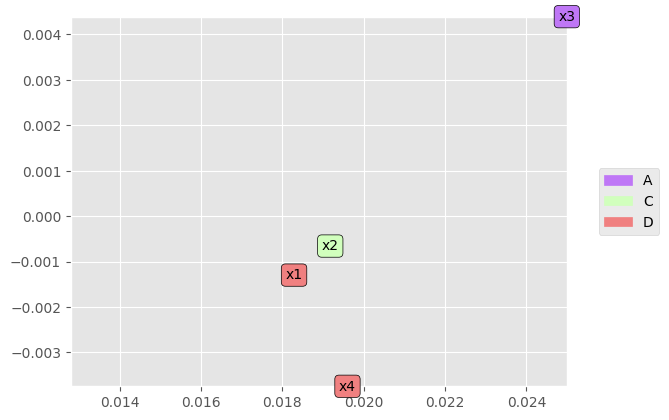

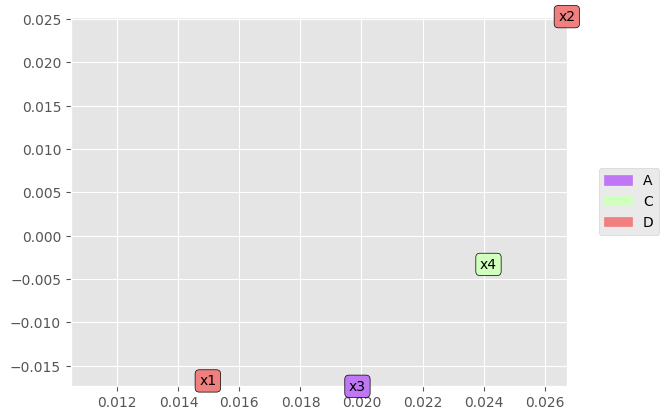

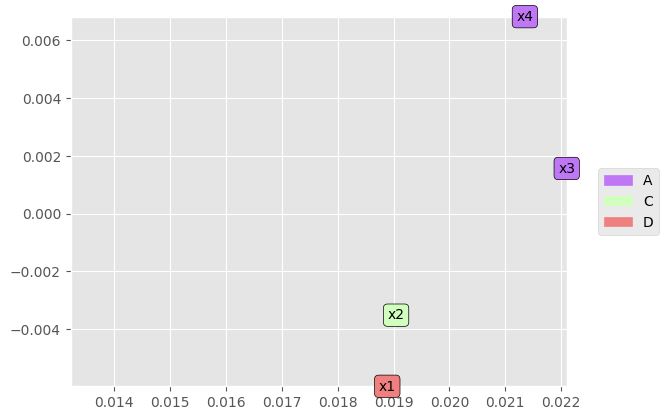

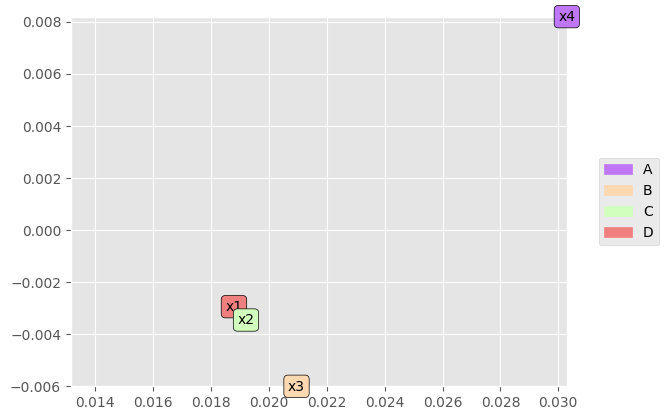

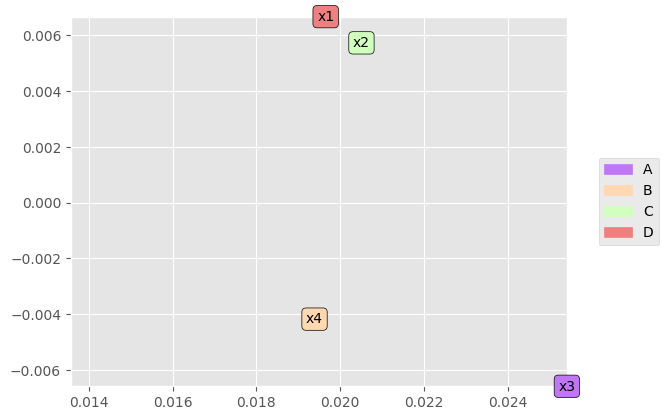

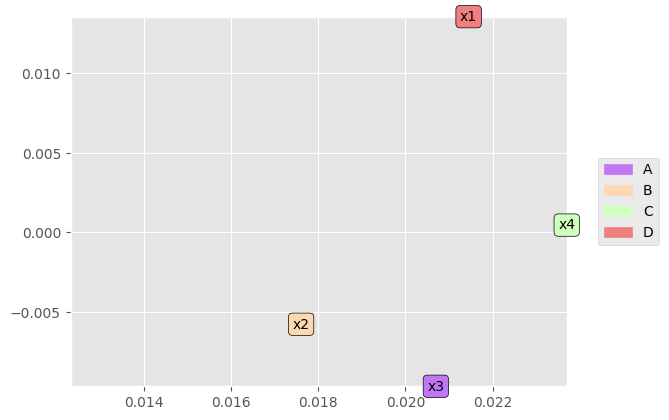

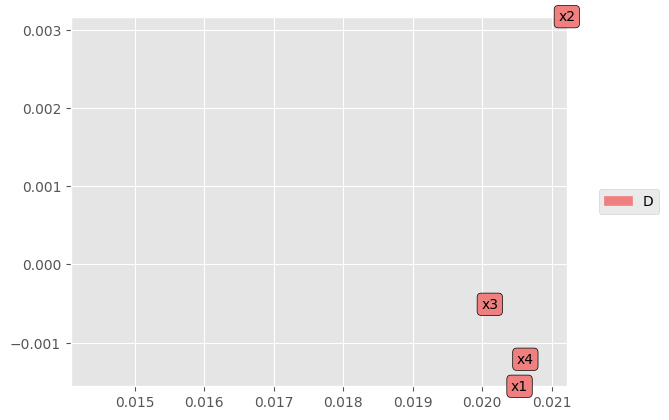

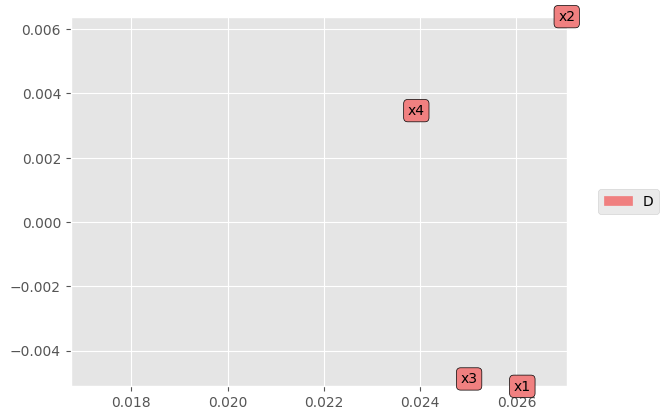

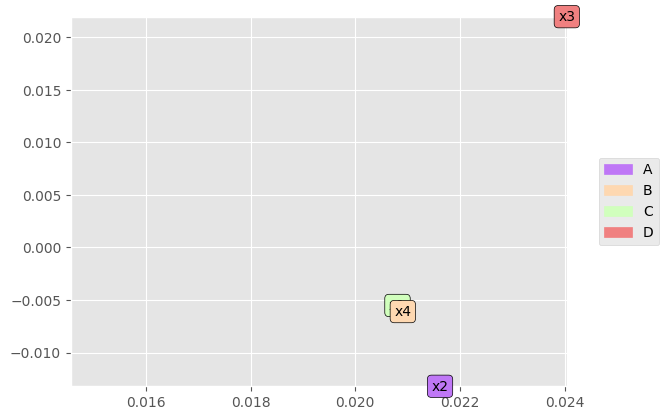

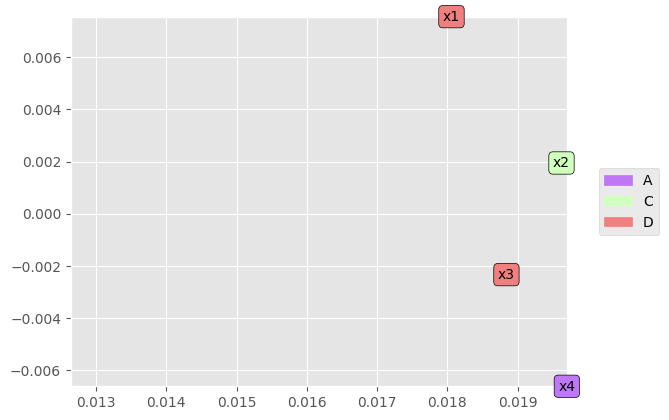

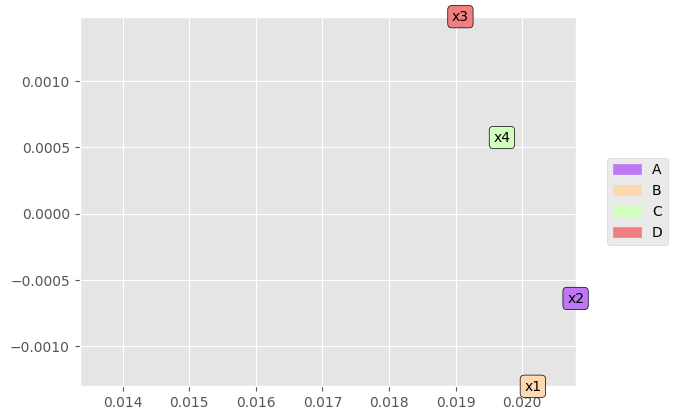

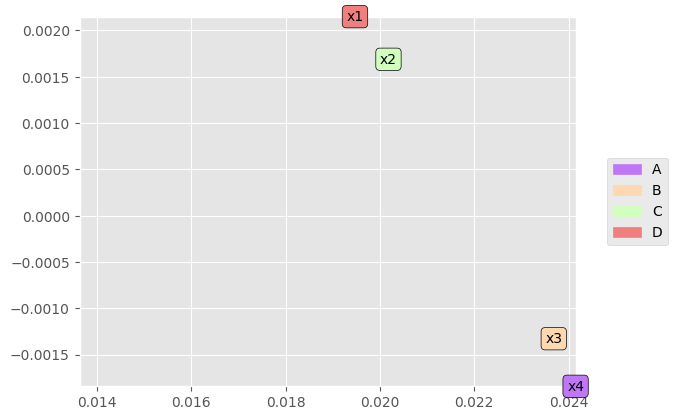

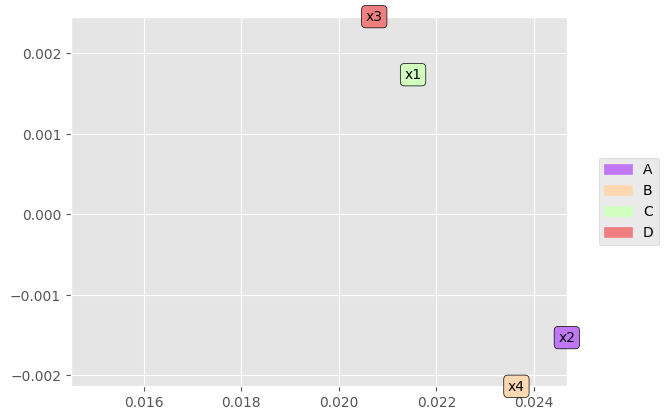

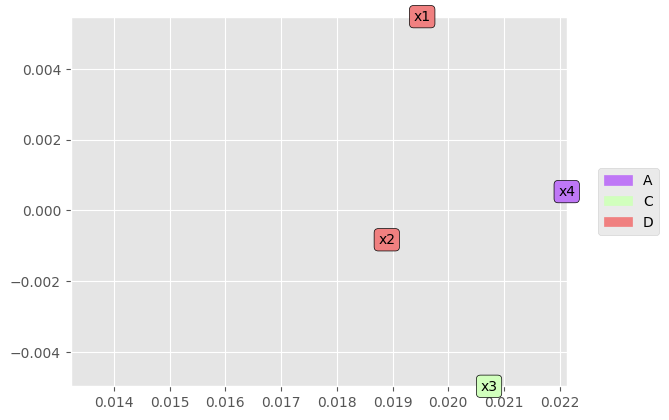

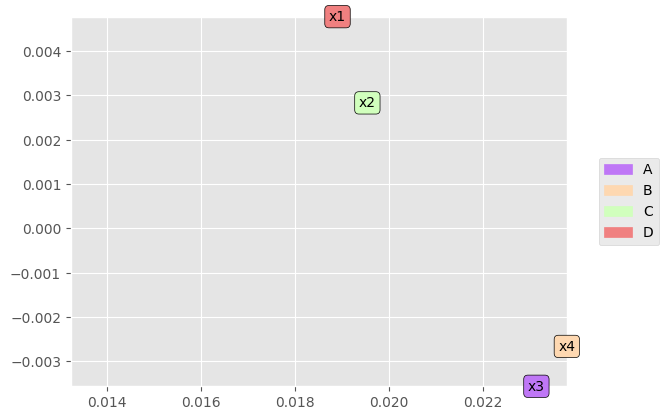

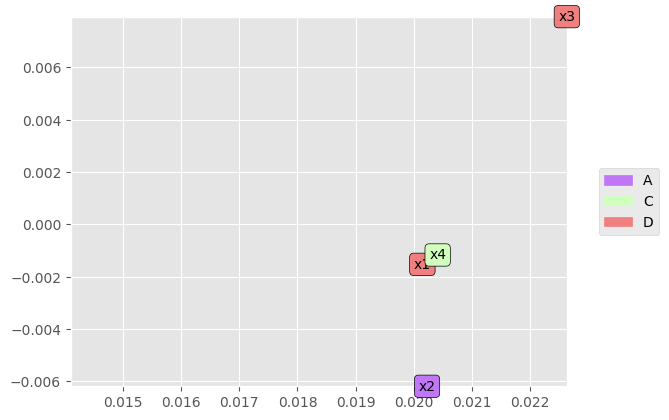

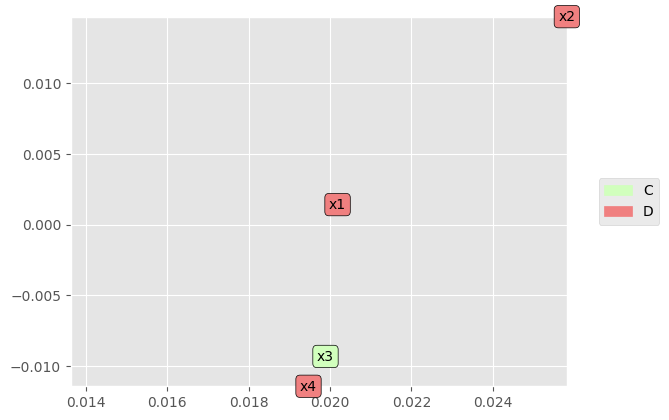

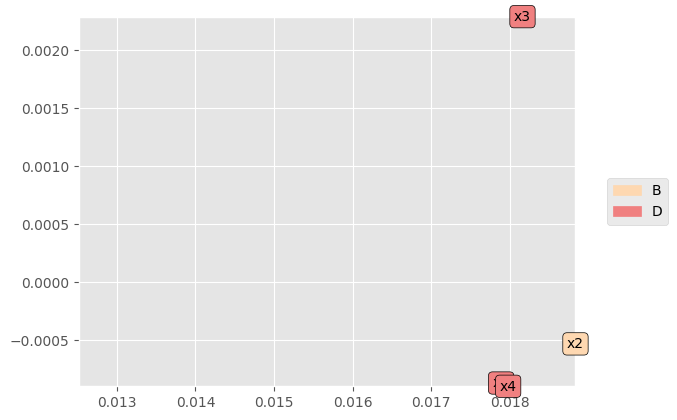

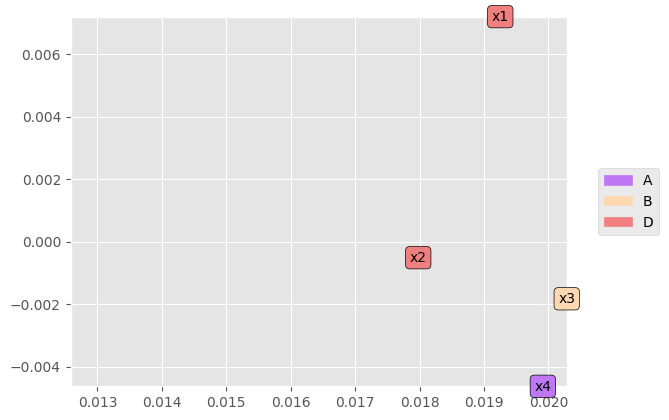

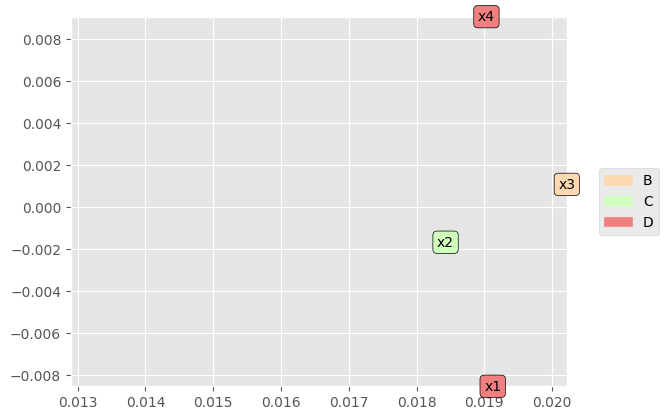

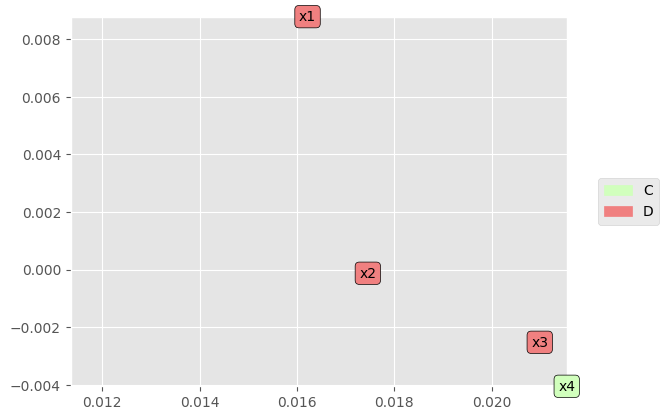

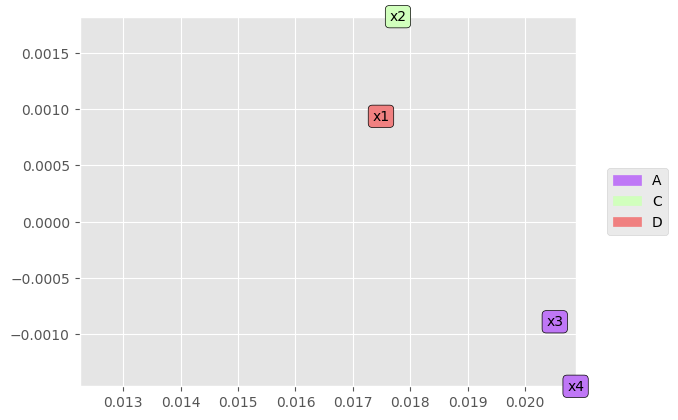

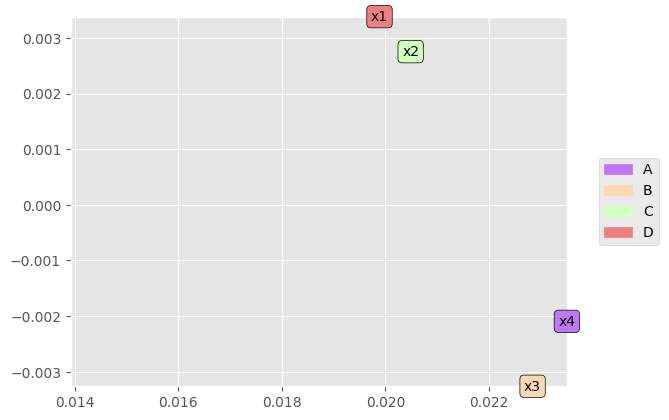

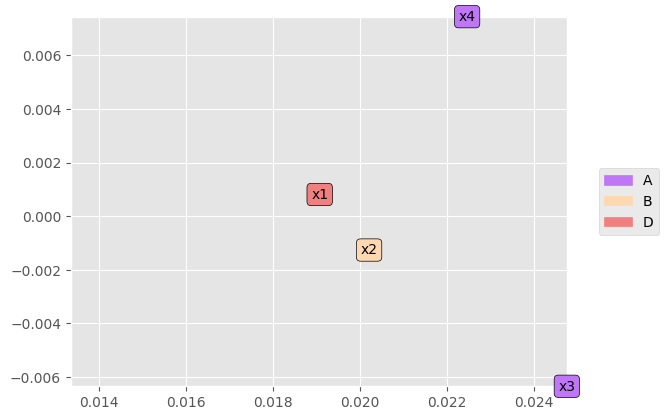

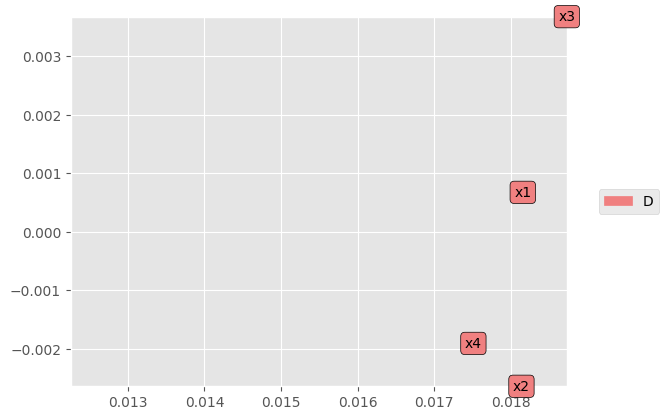

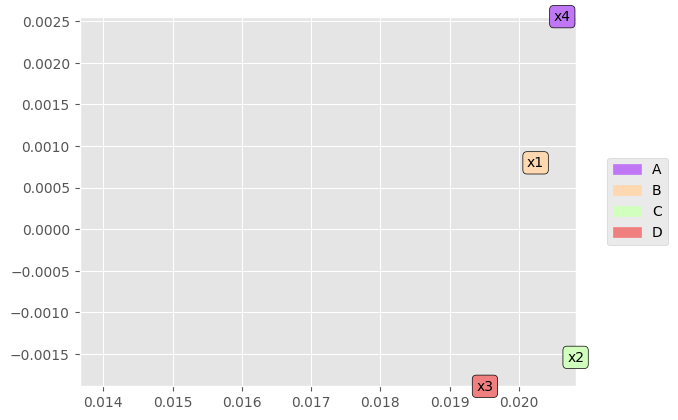

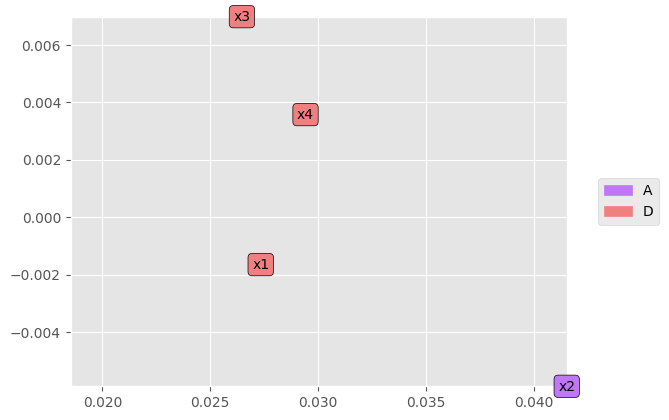

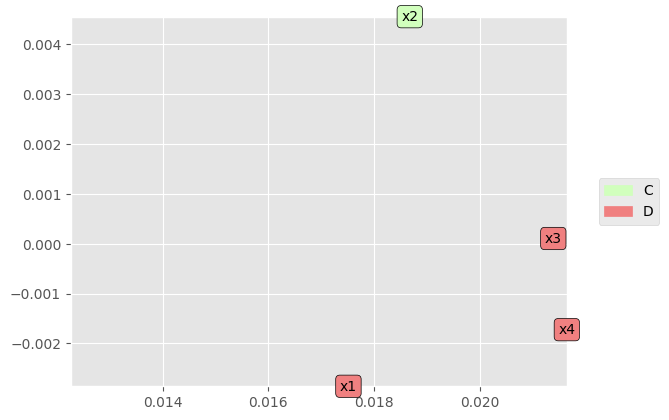

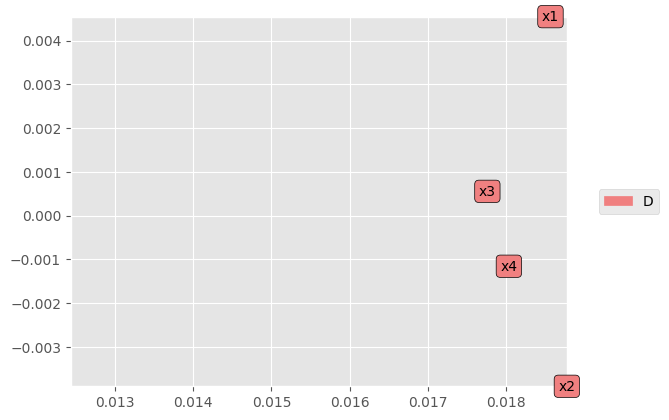

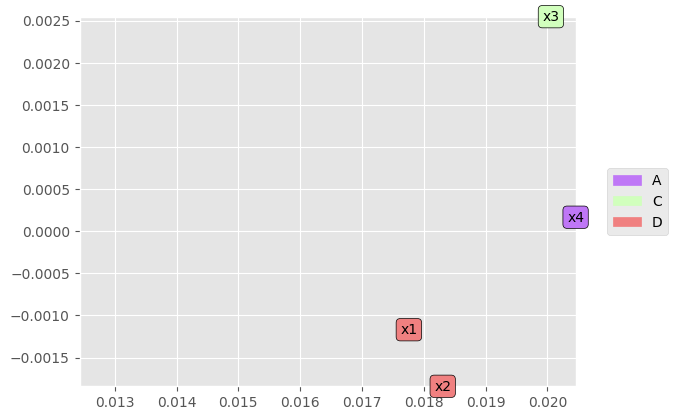

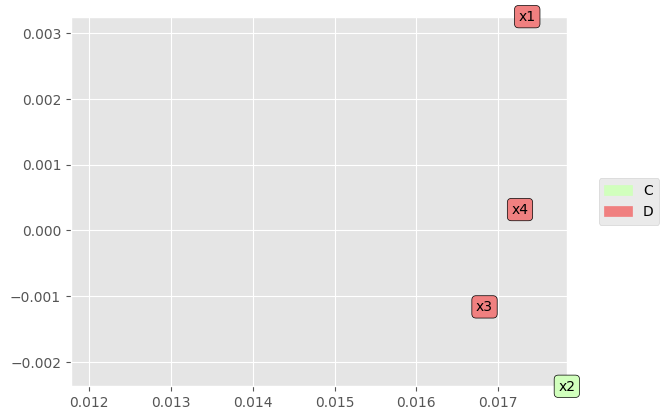

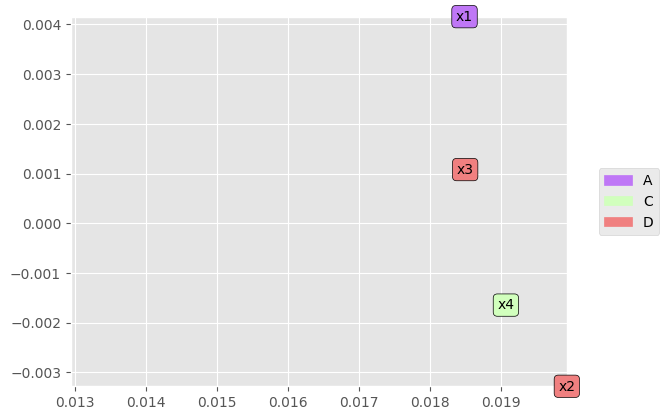

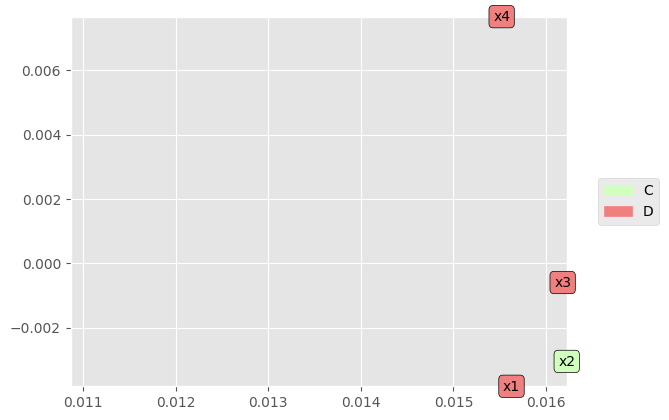

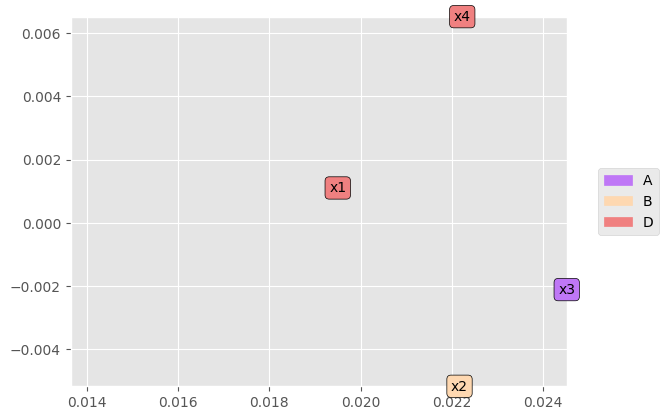

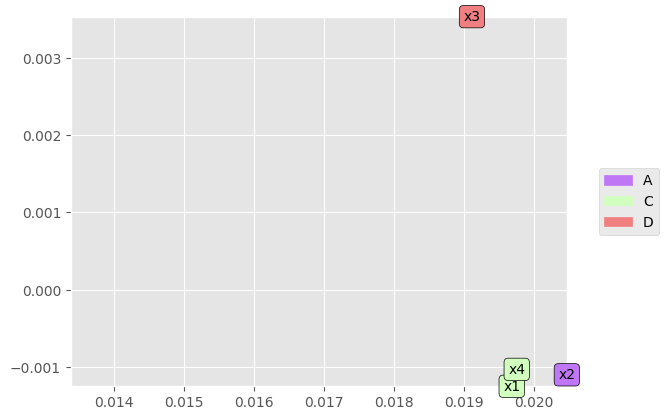

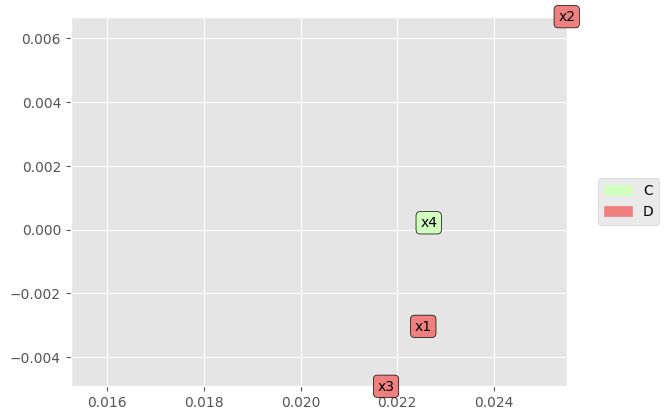

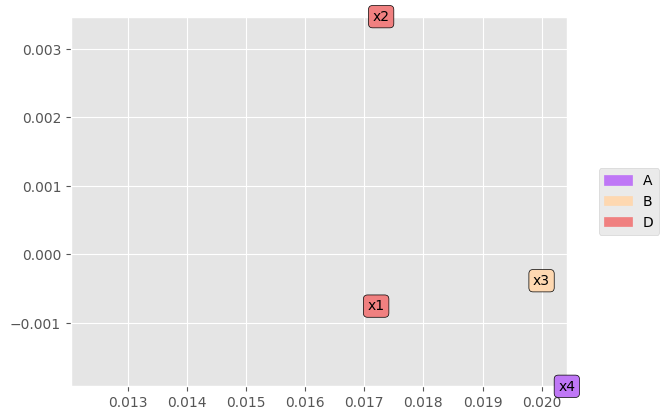

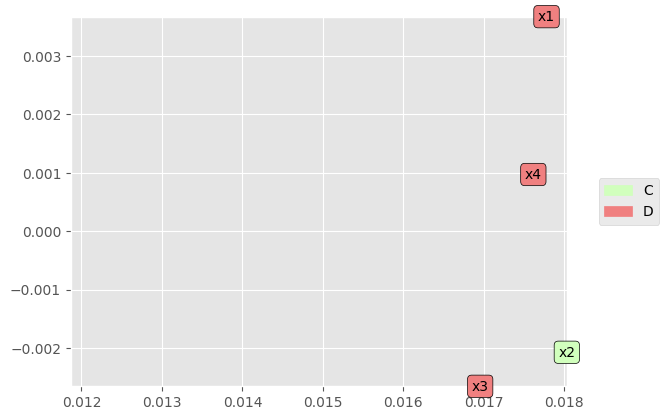

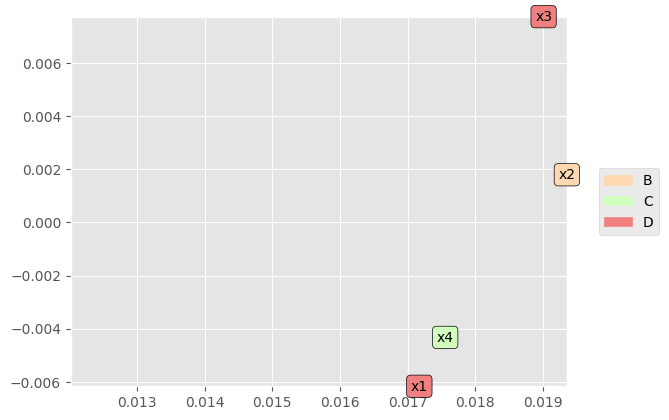

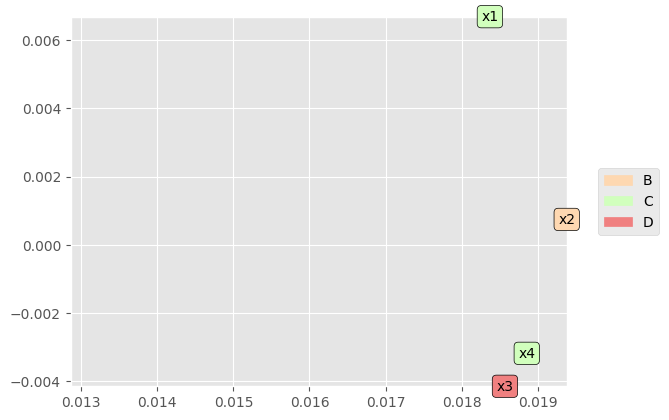

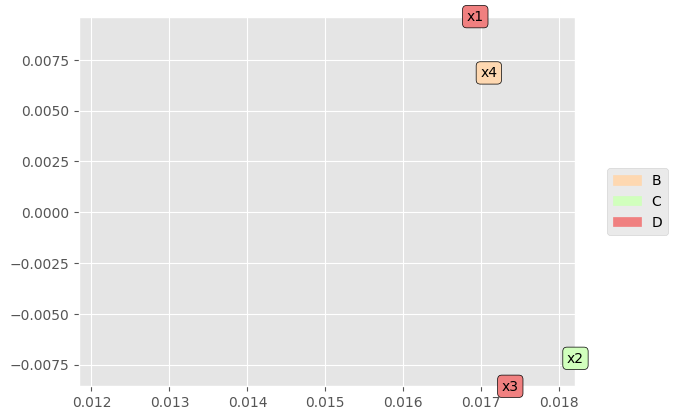

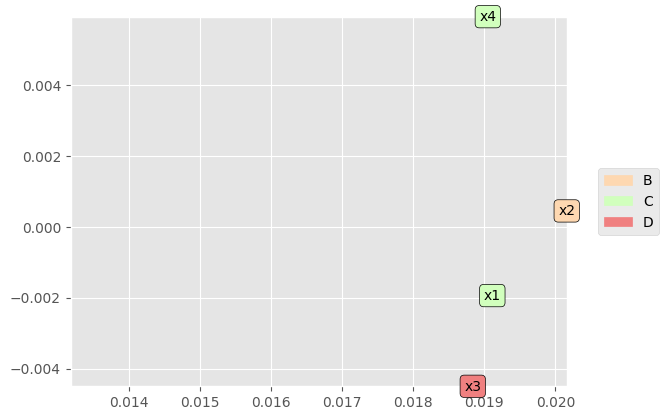

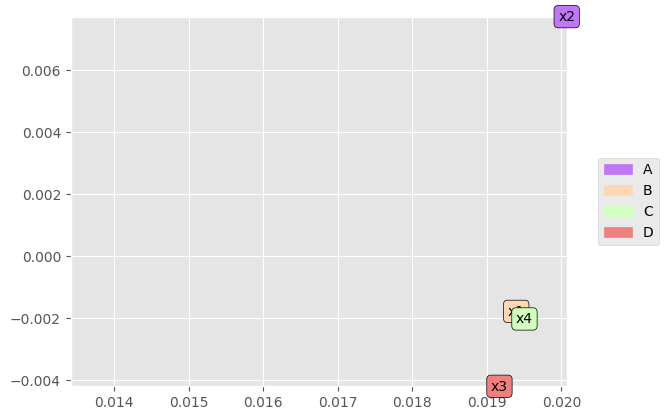

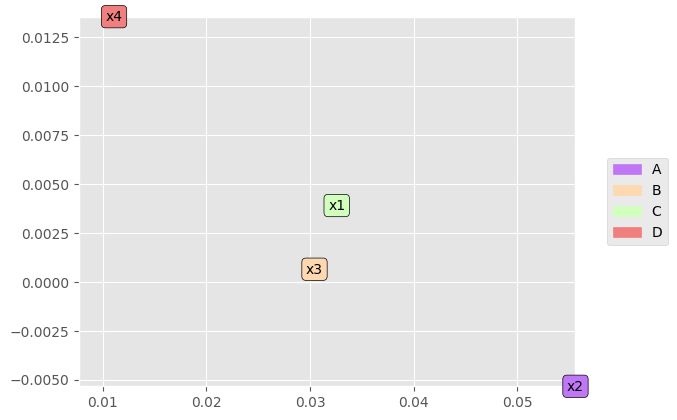

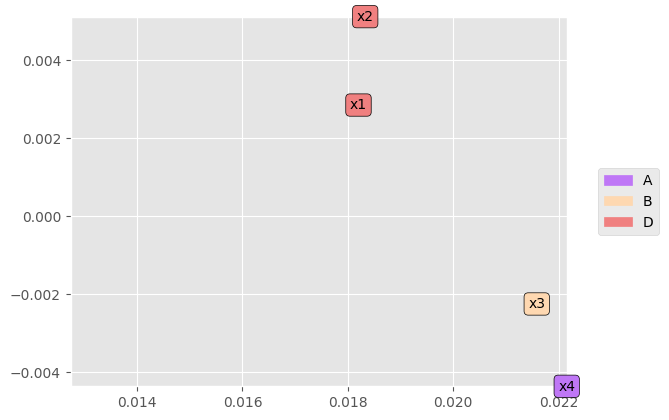

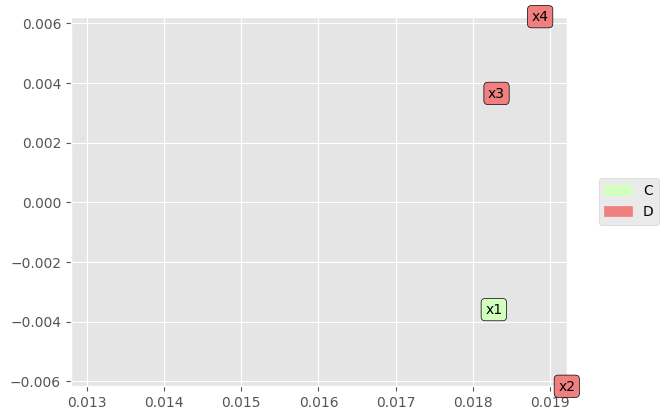

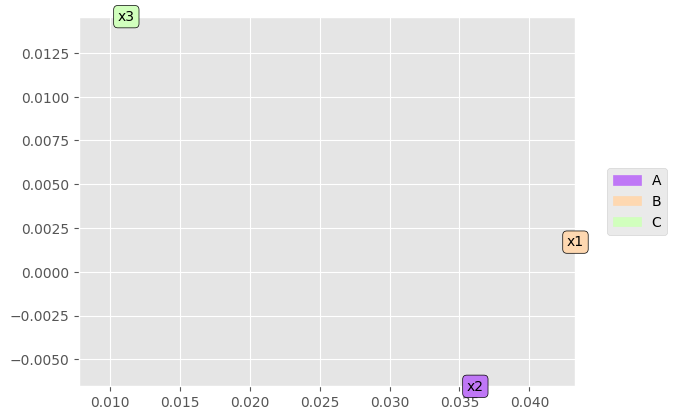

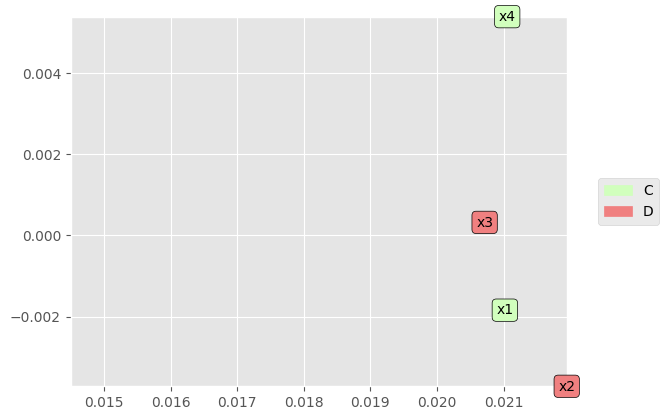

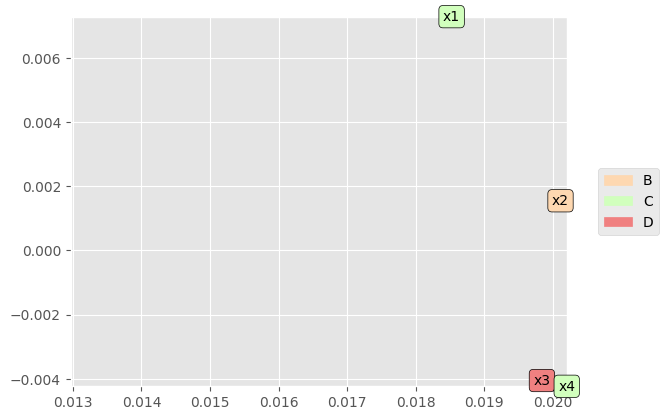

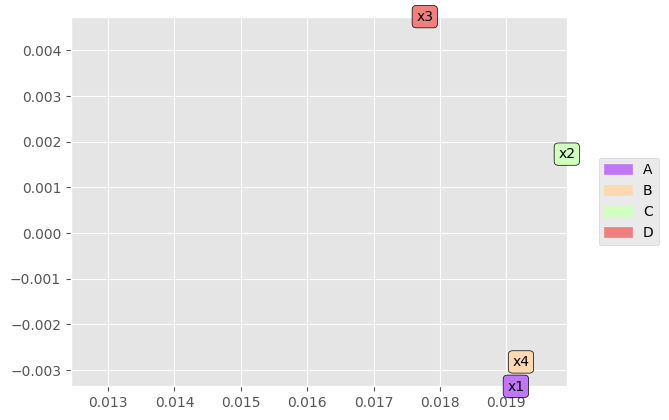

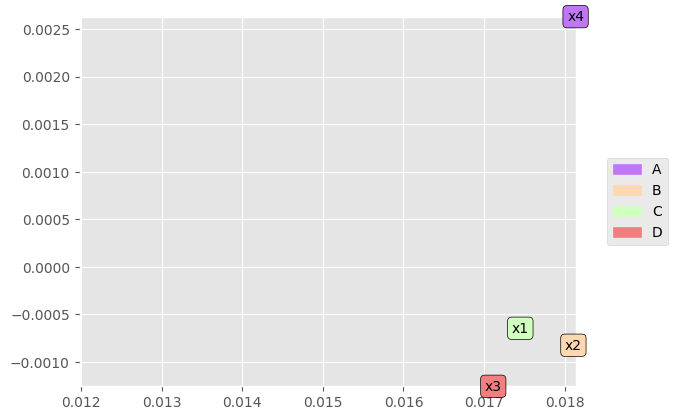

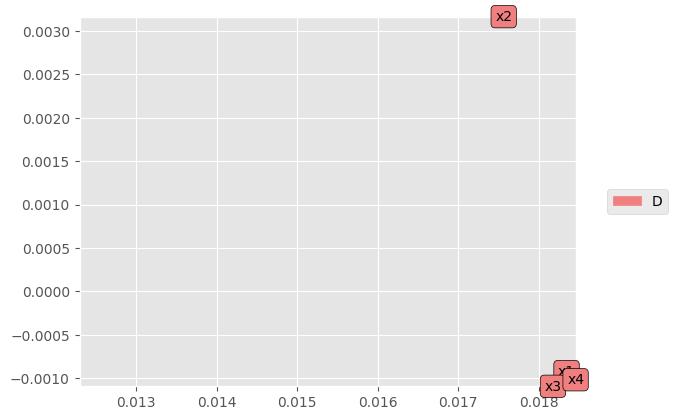

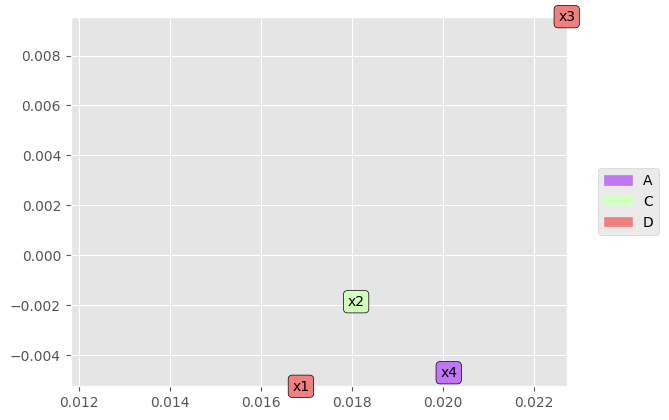

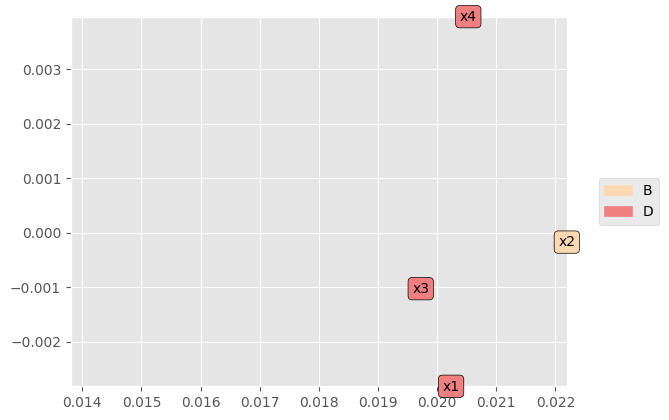

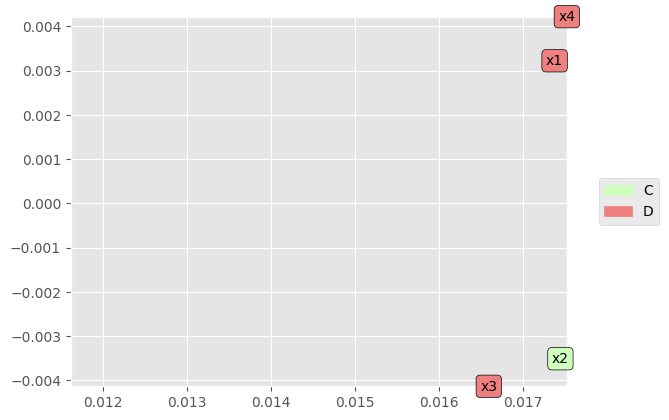

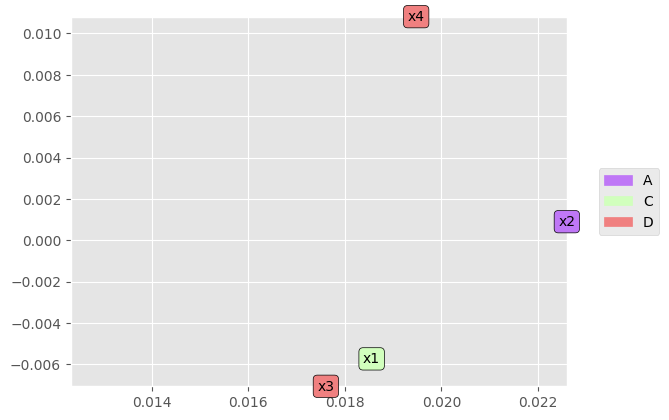

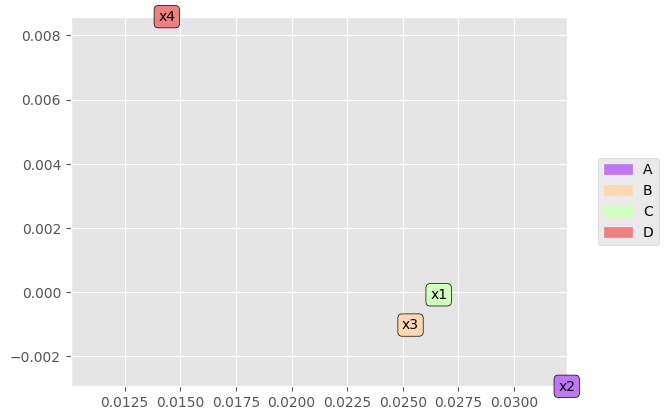

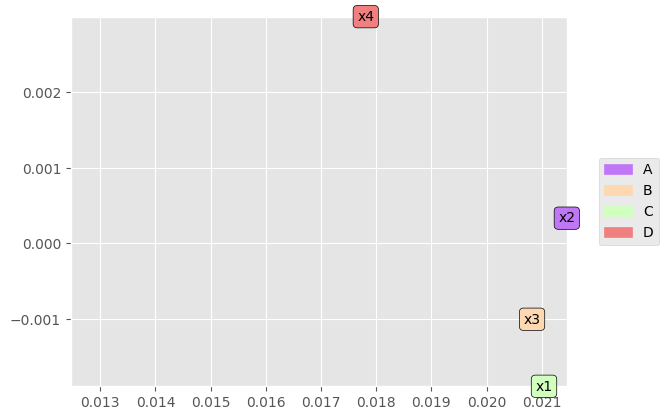

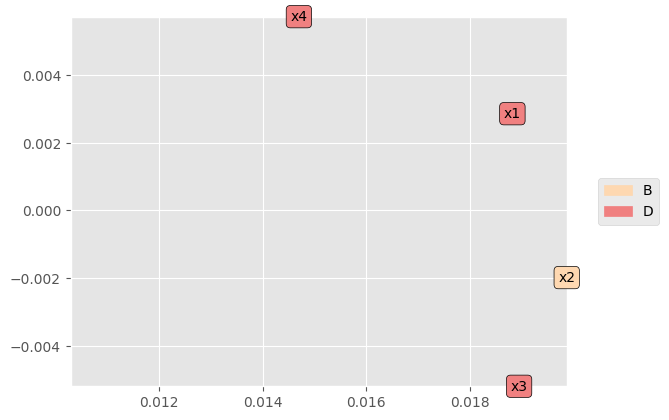

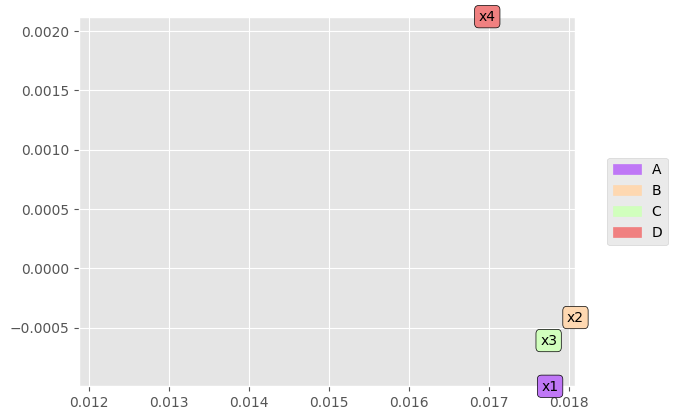

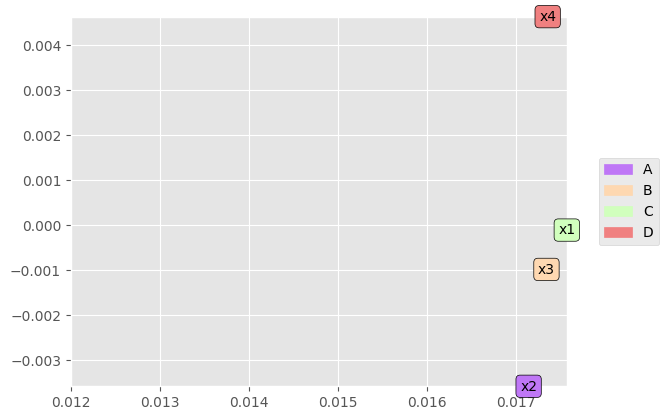

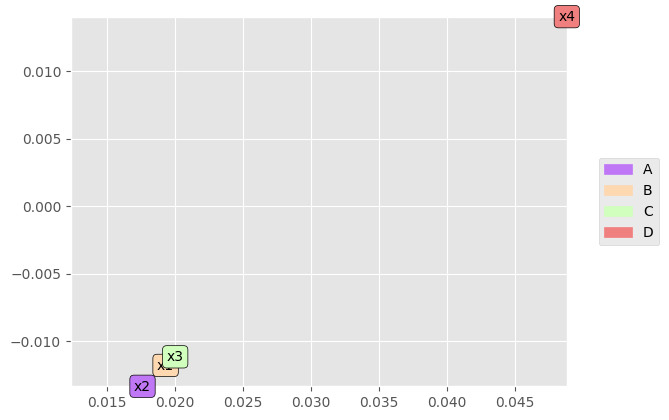

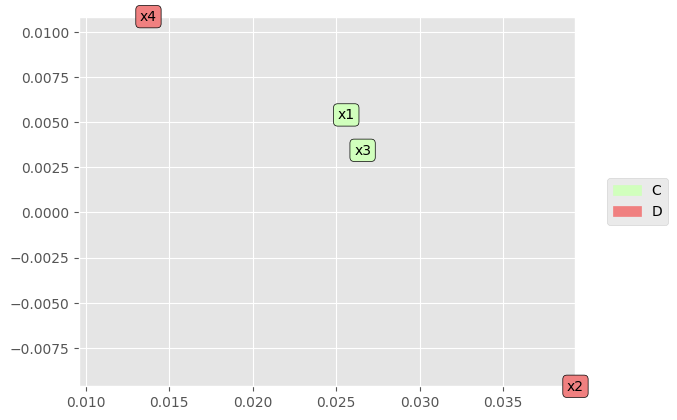

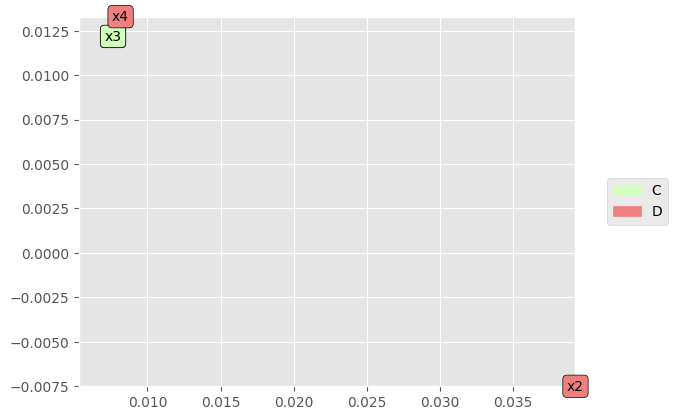

In [ ]:
i=0
for idlote in idlote_arrays[0:1]:
    idanimal_arrays = tmp_df.loc[tmp_df['idlote']==idlote,'idanimal'].unique() 
    for idanimal in idanimal_arrays:
        temp = tmp_df.loc[(tmp_df['idanimal']==idanimal)&(tmp_df['idlote']==idlote),:]
        temp = temp.reset_index(drop=True)
        temp = temp.drop(['idanimal','idlote','tipo_venda'],axis=1)
        # Plot - Tree Model
        util_e_tri_b.plot_points(temp.to_numpy(), prediction_list[i])
        i+=1

In [ ]:
i=0
for idlote in idlote_arrays[0:1]:
    idanimal_arrays = tmp_df.loc[tmp_df['idlote']==idlote,'idanimal'].unique() 
    for idanimal in idanimal_arrays:
        temp = tmp_df.loc[(tmp_df['idanimal']==idanimal)&(tmp_df['idlote']==idlote),:]
        temp = temp.reset_index(drop=True)
        temp = temp.drop(['idanimal','idlote','tipo_venda'],axis=1)
        print('######################################################################################')
        # Elicitated Paramneters
        if temp.shape[0] == 4:
          w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(modelos_list[i], number_of_classes = classes) 
        if temp.shape[0] == 3:
          w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(modelos_list[i], number_of_classes = 3) 
        print('Criteria Weights: ', np.around(w_mean, decimals = 2))
        print('Q: ', np.around(q_mean, decimals = 2))
        print('P: ', np.around(p_mean, decimals = 2))
        print('V: ', np.around(v_mean, decimals = 2))
        for i in range(0, len(b_mean)):
          print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
        print('Lambda Cutoff: ', round(cut_mean,  2))
        print('Accuracy: ',      round(acc_mean,  2))
        i+=1

######################################################################################
Criteria Weights:  [0.55 0.81 0.56 0.5  0.51 0.26 0.39]
Q:  [0. 0. 0. 0. 0. 0. 0.]
P:  [0. 0. 0. 0. 0. 0. 0.]
V:  [2. 2. 2. 2. 2. 2. 2.]
b1:  [0.01 0.   0.01 0.   0.06 0.   0.  ]
b2:  [0.01 0.01 0.01 0.   0.06 0.   0.  ]
b3:  [0.01 0.01 0.01 0.   0.08 0.   0.  ]
Lambda Cutoff:  0.68
Accuracy:  0.65
######################################################################################
Criteria Weights:  [0.58 0.55 0.62 0.33 0.47 0.31 0.25]
Q:  [0. 0. 0. 0. 0. 0. 0.]
P:  [0. 0. 0. 0. 0. 0. 0.]
V:  [2. 2. 2. 2. 2. 2. 2.]
b1:  [0.01 0.01 0.01 0.   0.01 0.   0.  ]
b2:  [0.01 0.01 0.01 0.   0.01 0.   0.  ]
b3:  [0.01 0.01 0.01 0.   0.01 0.   0.  ]
Lambda Cutoff:  0.59
Accuracy:  0.48
######################################################################################
Criteria Weights:  [0.58 0.55 0.62 0.33 0.47 0.31 0.25]
Q:  [0. 0. 0. 0. 0. 0. 0.]
P:  [0. 0. 0. 0. 0. 0. 0.]
V:  [2. 2. 2. 2. 2. 2. 2.]
b1

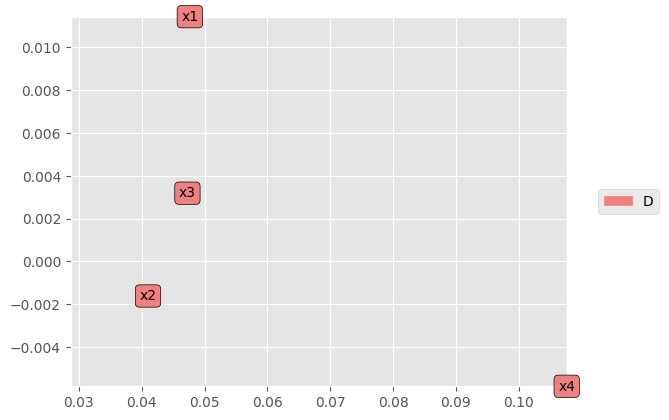

In [ ]:
# Plot - Elicitated Parameters
e_tri = util_e_tri_b.electre_tri_b(temp.to_numpy(), W = w_mean, Q = q_mean, P = p_mean, V = v_mean, B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True)

In [ ]:
# Plot Tree Model - Decision Boundaries
tree_e_tri_b.plot_decision_boundaries(temp.to_numpy(), models)  

In [ ]:
# Plot Mean Model - Decision Boundaries  
model_mean = []
model_mean.append([w_mean, acc_mean, [], [], [], b_mean, cut_mean, [], [], q_mean, p_mean, v_mean])
tree_e_tri_b.plot_decision_boundaries(temp.to_numpy(), model_mean)